In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import os
from random import randint
import sys

In [2]:
sys.path.append("../")
tests_dir = os.path.abspath("../tests")
sys.path.append(tests_dir)

In [3]:
from traffic_simulator.traffic_analyzer import TrafficAnalyzer
from conftest import generate_static_city_map, generate_static_trips

# Generate City Map

In [4]:
city_map = generate_static_city_map()
city_map

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2
{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_26778/980570067.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(city_map)


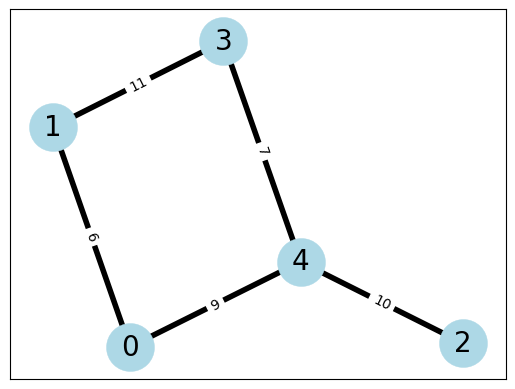

In [5]:
# some properties
print("node degree and node clustering")
for v in nx.nodes(city_map):
    print(f"{v} {nx.degree(city_map, v)} {nx.clustering(city_map, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(city_map):
    print(line)

links = [(u, v) for (u, v, d) in city_map.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(city_map)
nx.draw_networkx_nodes(city_map, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(city_map, pos, edgelist=links, width=4)                               # draw edges

# node labels
nx.draw_networkx_labels(city_map, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(city_map, 'weight','trips')
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(city_map, pos, edge_labels)

plt.show()

# Generate Static Trips

In [6]:
trips = generate_static_trips()
trips

{Trip(source=0, destination=2, numer_of_trips=1): Trip(source=0, destination=2, numer_of_trips=1),
 Trip(source=2, destination=0, numer_of_trips=1): Trip(source=2, destination=0, numer_of_trips=1),
 Trip(source=0, destination=3, numer_of_trips=1): Trip(source=0, destination=3, numer_of_trips=1),
 Trip(source=3, destination=0, numer_of_trips=1): Trip(source=3, destination=0, numer_of_trips=1),
 Trip(source=1, destination=2, numer_of_trips=1): Trip(source=1, destination=2, numer_of_trips=1),
 Trip(source=2, destination=1, numer_of_trips=2): Trip(source=2, destination=1, numer_of_trips=2),
 Trip(source=1, destination=4, numer_of_trips=1): Trip(source=4, destination=1, numer_of_trips=2),
 Trip(source=4, destination=1, numer_of_trips=2): Trip(source=4, destination=1, numer_of_trips=2),
 Trip(source=2, destination=3, numer_of_trips=3): Trip(source=2, destination=3, numer_of_trips=3),
 Trip(source=3, destination=2, numer_of_trips=1): Trip(source=3, destination=2, numer_of_trips=1),
 Trip(sour

# Generate Benefit Matrix

In [7]:
benefit_matrix = TrafficAnalyzer.get_road_recommendations(city_map, trips)
benefit_matrix

,source,destination,benefit
0,1,2,30.0
1,0,3,12.8
2,1,4,42.0
3,2,3,38.6
4,0,2,38.0


# Generate Random Trips

In [19]:
seed = 1000           # seed the graph for reproducibility, you should be doing this once you generate a connected graph
G = nx.gnp_random_graph (60, .05, seed=seed) # uncomment this and the above line once you have a connected graph.

In [20]:
for u, v in G.edges:
  G.add_edge(u, v, weight=randint(5,25))

In [21]:
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

In [22]:
light_blue = "#87CEEB"
node_colors = []

for color in range(0, len(G.nodes)):
    node_colors.append(light_blue)

<module 'matplotlib.pyplot' from '/Users/facts/mambaforge/envs/traffic_simulator/lib/python3.9/site-packages/matplotlib/pyplot.py'>

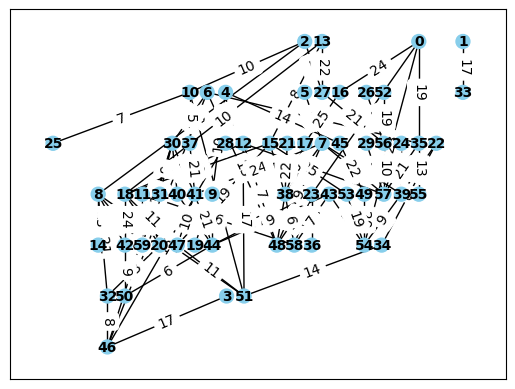

In [23]:
pos = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=pos, node_color=node_colors, node_size=100, node_shape='o', with_labels=False)
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt

In [24]:
print(f"Length of edges {len(G.edges)}")

Length of edges 92


In [25]:
print("Node degree and node cluster")

for node in nx.nodes(G):
    print(f"{node} {nx.degree(G, node)} {round(nx.clustering(G, node))})")

Node degree and node cluster
0 4 0)
1 1 0)
2 3 0)
3 1 0)
4 3 0)
5 1 0)
6 4 0)
7 6 0)
8 6 0)
9 3 0)
10 4 0)
11 3 0)
12 4 0)
13 3 0)
14 1 0)
15 5 0)
16 2 0)
17 2 0)
18 6 0)
19 1 0)
20 3 0)
21 1 0)
22 2 0)
23 5 0)
24 2 0)
25 1 0)
26 1 0)
27 3 0)
28 2 0)
29 1 0)
30 6 0)
31 1 0)
32 3 0)
33 1 0)
34 2 0)
35 4 0)
36 1 0)
37 2 0)
38 6 0)
39 4 0)
40 2 0)
41 5 0)
42 3 0)
43 3 0)
44 6 0)
45 2 0)
46 5 0)
47 4 0)
48 5 0)
49 2 0)
50 2 0)
51 5 0)
52 1 0)
53 2 0)
54 5 0)
55 1 0)
56 4 0)
57 6 0)
58 4 0)
59 3 0)


In [26]:
print("Adjency List")

for line in nx.generate_adjlist(H):
    print(line)

Adjency List
0 1 4
1 3
4 2 3
3
2


In [27]:
dir(nx)

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_dispatch',
 '_lazy_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivity',
 'algorithms',
 

In [28]:
nx.dijkstra_path(G, 0, 4)

[0, 23, 44, 9, 4]

In [30]:
node_data = G.nodes(100)
node_data

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None, 58: None, 59: None}, data=100)

In [31]:
edge_data = G.edges[0, 23]
edge_data

{'weight': 16}

In [32]:
type(edge_data)

dict

In [ ]:
traffic_simulator